In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import category_encoders as ce
from sklearn import preprocessing 


df_heart = pd.read_csv('heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df_heart.shape

(303, 14)

In [3]:
#Проверяем наличие размеченных и не размеченных данных, что бы понять стоит ли дальше проводить анализ
df_heart['target'].value_counts(normalize=True)

target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

#### Как видим выборка состоит из 14 признаков, по 303 пациентам. Как видим 54% пациентом имеющих болезнь сердца. К сожалению не совсем понятно, какая именно болезнь сердца у пациентов, поэтому мы предполагаем что признак болезнь сердца говорит о всех пациентах диагностированных сердечно-сосудистыми заболеваниями. 

In [5]:
#Переименовываем поля для удобства 
df_heart = df_heart.rename(columns = {
    "age": "возраст",
    "sex": "пол (1 - мужчина, 0 - женщина)",
    "cp": "тип боли в груди (4 значения)",
    "trestbps": "артериальное давление в покое",
    "chol": "холестерин сыворотки в мг/дл",
    "fbs": "уровень сахара в крови натощак > 120 мг/дл",
    "restecg": "результаты электрокардиографии в покое (значения 0,1,2)",
    "thalach": "достигнута максимальная частота сердечных сокращений",
    "exang": "стенокардия, вызванная физической нагрузкой",
    "oldpeak": "депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя",
    "slope": "наклон пикового сегмента ST при нагрузке",
    "ca": "количество крупных сосудов (0-3), окрашенных при флюроскопии",
    "thal":  "дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект",
    "old": "Старше 60 лет"
})

In [6]:
df_heart.head()

,возраст,"пол (1 - мужчина, 0 - женщина)",тип боли в груди (4 значения),артериальное давление в покое,холестерин сыворотки в мг/дл,уровень сахара в крови натощак > 120 мг/дл,"результаты электрокардиографии в покое (значения 0,1,2)",достигнута максимальная частота сердечных сокращений,"стенокардия, вызванная физической нагрузкой","депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя",наклон пикового сегмента ST при нагрузке,"количество крупных сосудов (0-3), окрашенных при флюроскопии","дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект",target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# Проверка null значений
df_heart.isnull().sum()

возраст                                                                          0
пол (1 - мужчина, 0 - женщина)                                                   0
тип боли в груди (4 значения)                                                    0
артериальное давление в покое                                                    0
холестерин сыворотки в мг/дл                                                     0
уровень сахара в крови натощак > 120 мг/дл                                       0
результаты электрокардиографии в покое (значения 0,1,2)                          0
достигнута максимальная частота сердечных сокращений                             0
стенокардия, вызванная физической нагрузкой                                      0
депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя    0
наклон пикового сегмента ST при нагрузке                                         0
количество крупных сосудов (0-3), окрашенных при флюроскопии                     0
дефе

In [8]:
# Проверка на дубликаты 
df_heart.duplicated().sum()

1

In [9]:
df_heart[df_heart.duplicated(keep=False)]

,возраст,"пол (1 - мужчина, 0 - женщина)",тип боли в груди (4 значения),артериальное давление в покое,холестерин сыворотки в мг/дл,уровень сахара в крови натощак > 120 мг/дл,"результаты электрокардиографии в покое (значения 0,1,2)",достигнута максимальная частота сердечных сокращений,"стенокардия, вызванная физической нагрузкой","депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя",наклон пикового сегмента ST при нагрузке,"количество крупных сосудов (0-3), окрашенных при флюроскопии","дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект",target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
df_heart = df_heart.drop_duplicates()

In [11]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   возраст                                                                        302 non-null    int64  
 1   пол (1 - мужчина, 0 - женщина)                                                 302 non-null    int64  
 2   тип боли в груди (4 значения)                                                  302 non-null    int64  
 3   артериальное давление в покое                                                  302 non-null    int64  
 4   холестерин сыворотки в мг/дл                                                   302 non-null    int64  
 5   уровень сахара в крови натощак > 120 мг/дл                                     302 non-null    int64  
 6   результаты электрокардиографии 

In [12]:
# Определяем категориальные, количественные, бинарные признаки
for col in df_heart.columns: 
    unique_vals = df_heart[col].nunique()
    if df_heart[col].dtype in ['int64','float64']:
        if unique_vals == 2:
            print(f"{col} - бинарный признак (два значения)")
        elif unique_vals < 5:
            print(f"{col} - категориальный признак (значений менее 5)")
        else:
            print(f"{col} - количественный признак")

возраст - количественный признак
пол (1 - мужчина, 0 - женщина) - бинарный признак (два значения)
тип боли в груди (4 значения) - категориальный признак (значений менее 5)
артериальное давление в покое - количественный признак
холестерин сыворотки в мг/дл - количественный признак
уровень сахара в крови натощак > 120 мг/дл - бинарный признак (два значения)
результаты электрокардиографии в покое (значения 0,1,2) - категориальный признак (значений менее 5)
достигнута максимальная частота сердечных сокращений - количественный признак
стенокардия, вызванная физической нагрузкой - бинарный признак (два значения)
депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя - количественный признак
наклон пикового сегмента ST при нагрузке - категориальный признак (значений менее 5)
количество крупных сосудов (0-3), окрашенных при флюроскопии - количественный признак
дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект - категориальный признак (значений ме

In [13]:
numeric_values = ['возраст','артериальное давление в покое','холестерин сыворотки в мг/дл', 'достигнута максимальная частота сердечных сокращений', 'депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя', 'количество крупных сосудов (0-3), окрашенных при флюроскопии']
categorical_values = ['тип боли в груди (4 значения)','результаты электрокардиографии в покое (значения 0,1,2)','наклон пикового сегмента ST при нагрузке','дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект']
binary_values = ['пол (1 - мужчина, 0 - женщина)','уровень сахара в крови натощак > 120 мг/дл','стенокардия, вызванная физической нагрузкой', 'target']

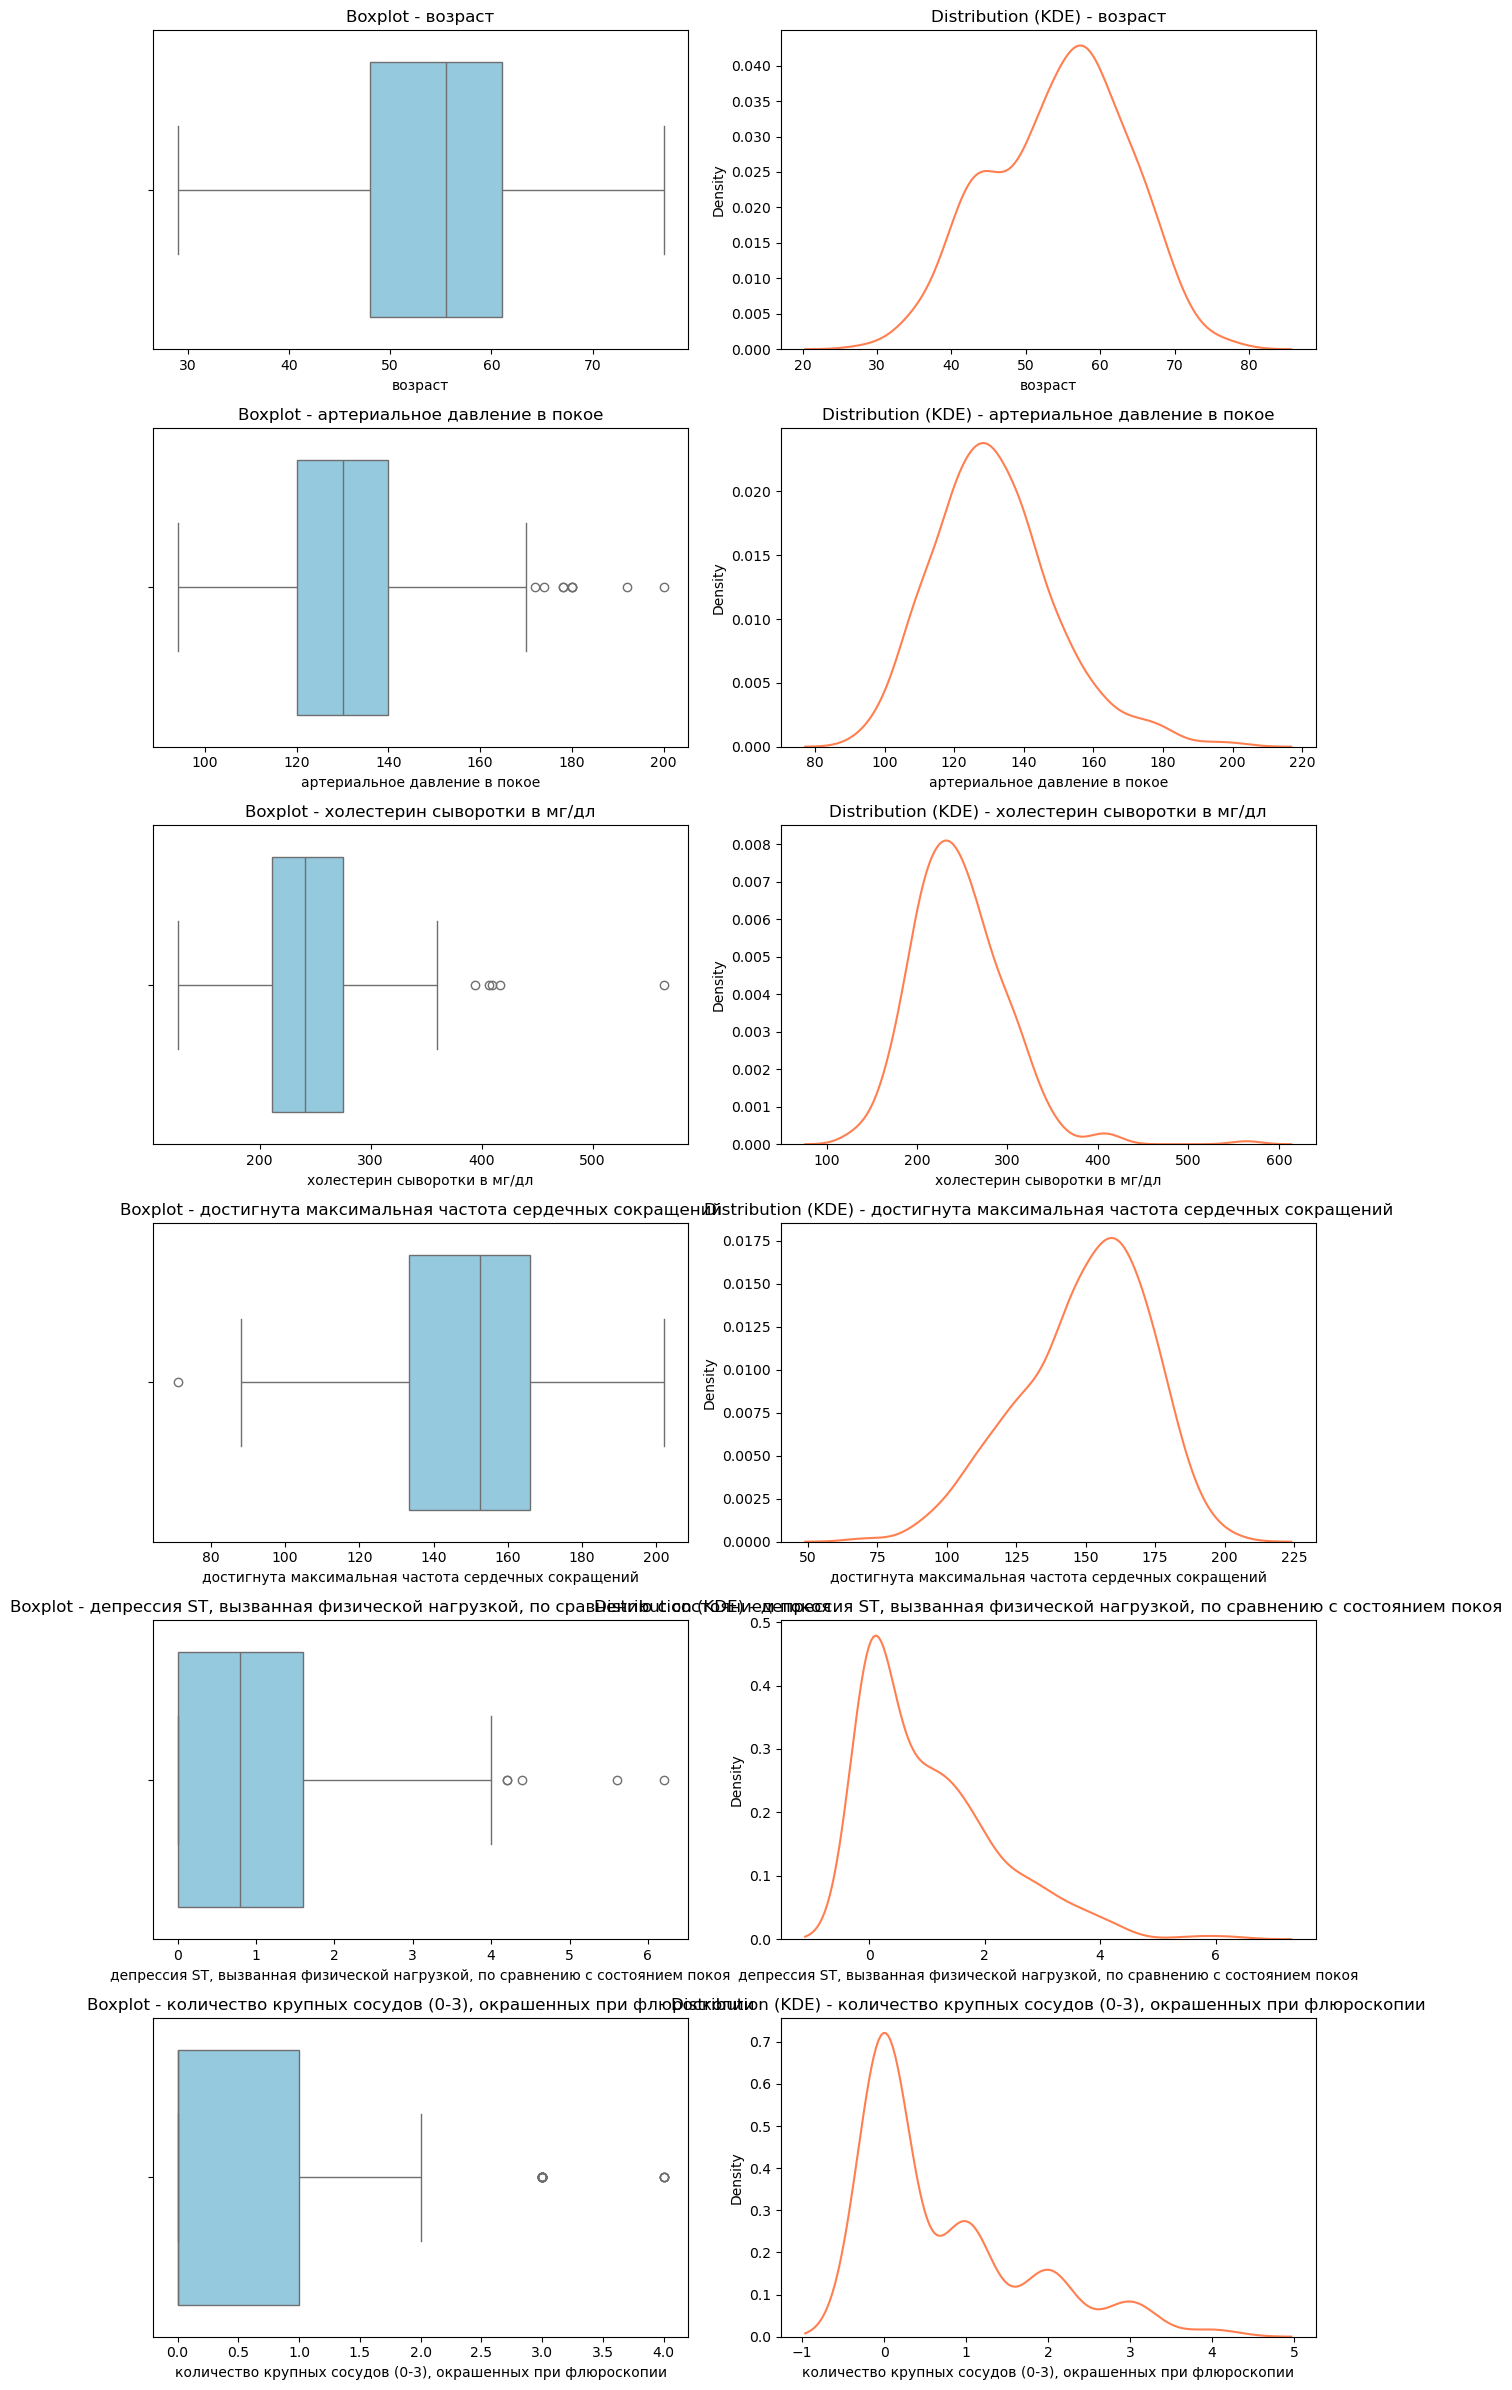

In [14]:
# Анализ выбросов
fig, axs = plt.subplots(len(numeric_values), 2, figsize=(12, 4* len(numeric_values)))

for i, col in enumerate(numeric_values):

    sns.boxplot(x=df_heart[col], ax = axs[i,0], color = 'skyblue')
    axs[i,0].set_title(f'Boxplot - {col}')

    sns.kdeplot(x =df_heart[col], ax =axs[i,1], color = 'coral')
    axs[i,1].set_title(f'Distribution (KDE) - {col}')

plt.tight_layout()
plt.show()

### Как видно на диаграммах бокс плот и kdeplot, почти все количественные признаки распределены не нормально. Удаление и либо замена признаков в данном кейсе не приемлемо, так как аномальные значения могут указывать на заболевания сердца.

## Детальное изучение выбросов

In [17]:
# Детальное изучение выбросов
outlier_rows = []
for col in numeric_values:
    Q1 = df_heart[col].quantile(0.25)
    Q3 = df_heart[col].quantile(0.75)
    Median = df_heart[col].median()
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = df_heart[(df_heart[col]<lower_bound)|(df_heart[col]>upper_bound)]

    for idx, row in outliers.iterrows():
        outliers_info = row.to_dict()
        outliers_info.update({
            "column_with_outlier": col,
            "type": "low" if row[col]<lower_bound else "high",
            "Q1": Q1,
            "Q3": Q3,
            "Median": Median,
            "IQR": IQR,
            "Lower bound": lower_bound,
            "Upper bound": upper_bound
        })
        outlier_rows.append(outliers_info)

outliers_df = pd.DataFrame(outlier_rows)

In [18]:
outliers_df.head()

,возраст,"пол (1 - мужчина, 0 - женщина)",тип боли в груди (4 значения),артериальное давление в покое,холестерин сыворотки в мг/дл,уровень сахара в крови натощак > 120 мг/дл,"результаты электрокардиографии в покое (значения 0,1,2)",достигнута максимальная частота сердечных сокращений,"стенокардия, вызванная физической нагрузкой","депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя",...,"дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект",target,column_with_outlier,type,Q1,Q3,Median,IQR,Lower bound,Upper bound
0,52.0,1.0,2.0,172.0,199.0,1.0,1.0,162.0,0.0,0.5,...,3.0,1.0,артериальное давление в покое,high,120.0,140.0,130.0,20.0,90.0,170.0
1,59.0,1.0,3.0,178.0,270.0,0.0,0.0,145.0,0.0,4.2,...,3.0,1.0,артериальное давление в покое,high,120.0,140.0,130.0,20.0,90.0,170.0
2,64.0,0.0,0.0,180.0,325.0,0.0,1.0,154.0,1.0,0.0,...,2.0,1.0,артериальное давление в покое,high,120.0,140.0,130.0,20.0,90.0,170.0
3,68.0,1.0,2.0,180.0,274.0,1.0,0.0,150.0,1.0,1.6,...,3.0,0.0,артериальное давление в покое,high,120.0,140.0,130.0,20.0,90.0,170.0
4,56.0,0.0,0.0,200.0,288.0,1.0,0.0,133.0,1.0,4.0,...,3.0,0.0,артериальное давление в покое,high,120.0,140.0,130.0,20.0,90.0,170.0


In [19]:
outliers_df['column_with_outlier'].value_counts()

column_with_outlier
количество крупных сосудов (0-3), окрашенных при флюроскопии                     24
артериальное давление в покое                                                     9
холестерин сыворотки в мг/дл                                                      5
депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя     5
достигнута максимальная частота сердечных сокращений                              1
Name: count, dtype: int64

In [20]:
outliers_df[outliers_df['column_with_outlier']=='количество крупных сосудов (0-3), окрашенных при флюроскопии'][['количество крупных сосудов (0-3), окрашенных при флюроскопии','Median','IQR','Q3','возраст','target']]

,"количество крупных сосудов (0-3), окрашенных при флюроскопии",Median,IQR,Q3,возраст,target
20,3.0,0.0,1.0,1.0,62.0,1.0
21,4.0,0.0,1.0,1.0,52.0,1.0
22,3.0,0.0,1.0,1.0,52.0,1.0
23,3.0,0.0,1.0,1.0,53.0,1.0
24,4.0,0.0,1.0,1.0,58.0,1.0
25,4.0,0.0,1.0,1.0,38.0,1.0
26,3.0,0.0,1.0,1.0,67.0,0.0
27,3.0,0.0,1.0,1.0,65.0,0.0
28,3.0,0.0,1.0,1.0,58.0,0.0
29,3.0,0.0,1.0,1.0,62.0,0.0


### Количество крупных сосудов при флюроскопии может достигать только 3, значение 4 либо аномалия либо не правильно кодировка значения Nan. В таких случаях я бы проконсультировалась с кардиологом. Но думаю что для данного случая, заменю значения на Nan

In [22]:
df_heart['количество крупных сосудов (0-3), окрашенных при флюроскопии'] = df_heart['количество крупных сосудов (0-3), окрашенных при флюроскопии'].replace(4,np.nan)

In [23]:
df_heart['количество крупных сосудов (0-3), окрашенных при флюроскопии'].value_counts(normalize=True, dropna=False)

количество крупных сосудов (0-3), окрашенных при флюроскопии
0.0    0.579470
1.0    0.215232
2.0    0.125828
3.0    0.066225
NaN    0.013245
Name: proportion, dtype: float64

In [24]:
outliers_df[outliers_df['column_with_outlier']=='артериальное давление в покое'][['артериальное давление в покое',
'Median','IQR','Q3','возраст','target']]

,артериальное давление в покое,Median,IQR,Q3,возраст,target
0,172.0,130.0,20.0,140.0,52.0,1.0
1,178.0,130.0,20.0,140.0,59.0,1.0
2,180.0,130.0,20.0,140.0,64.0,1.0
3,180.0,130.0,20.0,140.0,68.0,0.0
4,200.0,130.0,20.0,140.0,56.0,0.0
5,174.0,130.0,20.0,140.0,59.0,0.0
6,192.0,130.0,20.0,140.0,54.0,0.0
7,178.0,130.0,20.0,140.0,66.0,0.0
8,180.0,130.0,20.0,140.0,55.0,0.0


### Показатель артериального давления в покое может быть выше 170 и достигать 200 (как говорит chatgpt), поэтому не похоже что тут есть признак аномалии или ошибочно введенных данных с аномальным выбросом 

In [26]:
outliers_df[outliers_df['column_with_outlier']=='холестерин сыворотки в мг/дл'][['холестерин сыворотки в мг/дл',
'Median','IQR','Q3','возраст','target']]

,холестерин сыворотки в мг/дл,Median,IQR,Q3,возраст,target
9,417.0,240.5,63.75,274.75,65.0,1.0
10,564.0,240.5,63.75,274.75,67.0,1.0
11,394.0,240.5,63.75,274.75,62.0,1.0
12,407.0,240.5,63.75,274.75,63.0,0.0
13,409.0,240.5,63.75,274.75,56.0,0.0


### Уровень холестерина выше 300 уже считается опасно высоким, но не невозможным. Для таких случаев я бы проконсультировалась с кардиологом. Но в целом, не похоже не ошибку в данных или аномальным выбросом. Возможно у человека редкая болезнь при которой холестерин опасно высокий

In [28]:
outliers_df[outliers_df['column_with_outlier']=='депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя'][['депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя','Median','IQR','Q3','возраст','target']]

,"депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя",Median,IQR,Q3,возраст,target
15,4.2,0.8,1.6,1.6,59.0,1.0
16,6.2,0.8,1.6,1.6,62.0,0.0
17,5.6,0.8,1.6,1.6,55.0,0.0
18,4.2,0.8,1.6,1.6,51.0,0.0
19,4.4,0.8,1.6,1.6,58.0,0.0


### Показатель выбросов депрессии ST тоже вызывают подозрение, но не являются невозможными. Поэтому оставляем как есть

In [30]:
outliers_df[outliers_df['column_with_outlier']
=='достигнута максимальная частота сердечных сокращений'][['достигнута максимальная частота сердечных сокращений','Median','IQR','Q1','Q3','возраст','target']]

,достигнута максимальная частота сердечных сокращений,Median,IQR,Q1,Q3,возраст,target
14,71.0,152.5,32.75,133.25,166.0,67.0,0.0


### Максимальная частота сердечных сокращений не может быть ниже 90. Больше похоже не ошибку в данных, думаю стоит сделать замену значения на медиану

In [32]:
median_val = df_heart['достигнута максимальная частота сердечных сокращений'].median()

df_heart.loc[
    df_heart['достигнута максимальная частота сердечных сокращений'] < 90,
    'достигнута максимальная частота сердечных сокращений'
] = median_val

C:\Users\Asel\AppData\Local\Temp\ipykernel_19892\2540383760.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '152.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_heart.loc[


In [33]:
df_heart = df_heart.sort_values(by='достигнута максимальная частота сердечных сокращений', ascending=True)
df_heart.head()

,возраст,"пол (1 - мужчина, 0 - женщина)",тип боли в груди (4 значения),артериальное давление в покое,холестерин сыворотки в мг/дл,уровень сахара в крови натощак > 120 мг/дл,"результаты электрокардиографии в покое (значения 0,1,2)",достигнута максимальная частота сердечных сокращений,"стенокардия, вызванная физической нагрузкой","депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя",наклон пикового сегмента ST при нагрузке,"количество крупных сосудов (0-3), окрашенных при флюроскопии","дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект",target
297,59,1,0,164,176,1,0,90.0,0,1.0,1,2.0,1,0
262,53,1,0,123,282,0,1,95.0,1,2.0,1,2.0,3,0
136,60,0,2,120,178,1,1,96.0,0,0.0,2,0.0,2,1
233,64,1,0,120,246,0,0,96.0,1,2.2,0,1.0,2,0
216,62,0,2,130,263,0,1,97.0,0,1.2,1,1.0,3,0


In [34]:
#Кодировка категориальных признаков
df_heart[categorical_values] = df_heart[categorical_values].astype('category')

In [35]:
encoder = ce.OneHotEncoder(cols=categorical_values, drop_invariant=True, use_cat_names=True)
df_encoded=encoder.fit_transform(df_heart[categorical_values])

In [36]:
df_heart = pd.concat([df_heart.drop(columns=categorical_values), df_encoded], axis=1)

In [37]:
len(df_heart.columns)

24

In [38]:
replacements = {
    'тип боли в груди (4 значения)': 'тип боли',
    'результаты электрокардиографии в покое (значения 0,1,2)': 'экг',
    'наклон пикового сегмента ST при нагрузке': 'наклон ST',
    'дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект': 'дефект ST',
    'результаты электрокардиографии в покое (значения 0,1,2)': 'экг'
}

df_heart.rename(
    columns=lambda x: next((x.replace(old, new) for old, new in replacements.items() if old in x), x),
    inplace=True
)


In [39]:
df_heart.head()

,возраст,"пол (1 - мужчина, 0 - женщина)",артериальное давление в покое,холестерин сыворотки в мг/дл,уровень сахара в крови натощак > 120 мг/дл,достигнута максимальная частота сердечных сокращений,"стенокардия, вызванная физической нагрузкой","депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя","количество крупных сосудов (0-3), окрашенных при флюроскопии",target,...,экг_0.0,экг_1.0,экг_2.0,наклон ST_1.0,наклон ST_2.0,наклон ST_0.0,дефект ST_1.0,дефект ST_3.0,дефект ST_2.0,дефект ST_0.0
297,59,1,164,176,1,90.0,0,1.0,2.0,0,...,1,0,0,1,0,0,1,0,0,0
262,53,1,123,282,0,95.0,1,2.0,2.0,0,...,0,1,0,1,0,0,0,1,0,0
136,60,0,120,178,1,96.0,0,0.0,0.0,1,...,0,1,0,0,1,0,0,0,1,0
233,64,1,120,246,0,96.0,1,2.2,1.0,0,...,1,0,0,0,0,1,0,0,1,0
216,62,0,130,263,0,97.0,0,1.2,1.0,0,...,0,1,0,1,0,0,0,1,0,0


In [40]:
df_heart.columns

Index(['возраст', 'пол (1 - мужчина, 0 - женщина)',
       'артериальное давление в покое', 'холестерин сыворотки в мг/дл',
       'уровень сахара в крови натощак > 120 мг/дл',
       'достигнута максимальная частота сердечных сокращений',
       'стенокардия, вызванная физической нагрузкой',
       'депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя',
       'количество крупных сосудов (0-3), окрашенных при флюроскопии',
       'target', 'тип боли_0.0', 'тип боли_2.0', 'тип боли_1.0',
       'тип боли_3.0', 'экг_0.0', 'экг_1.0', 'экг_2.0', 'наклон ST_1.0',
       'наклон ST_2.0', 'наклон ST_0.0', 'дефект ST_1.0', 'дефект ST_3.0',
       'дефект ST_2.0', 'дефект ST_0.0'],
      dtype='object')

Text(0.5, 1.0, 'Матрица корреляции признаков')

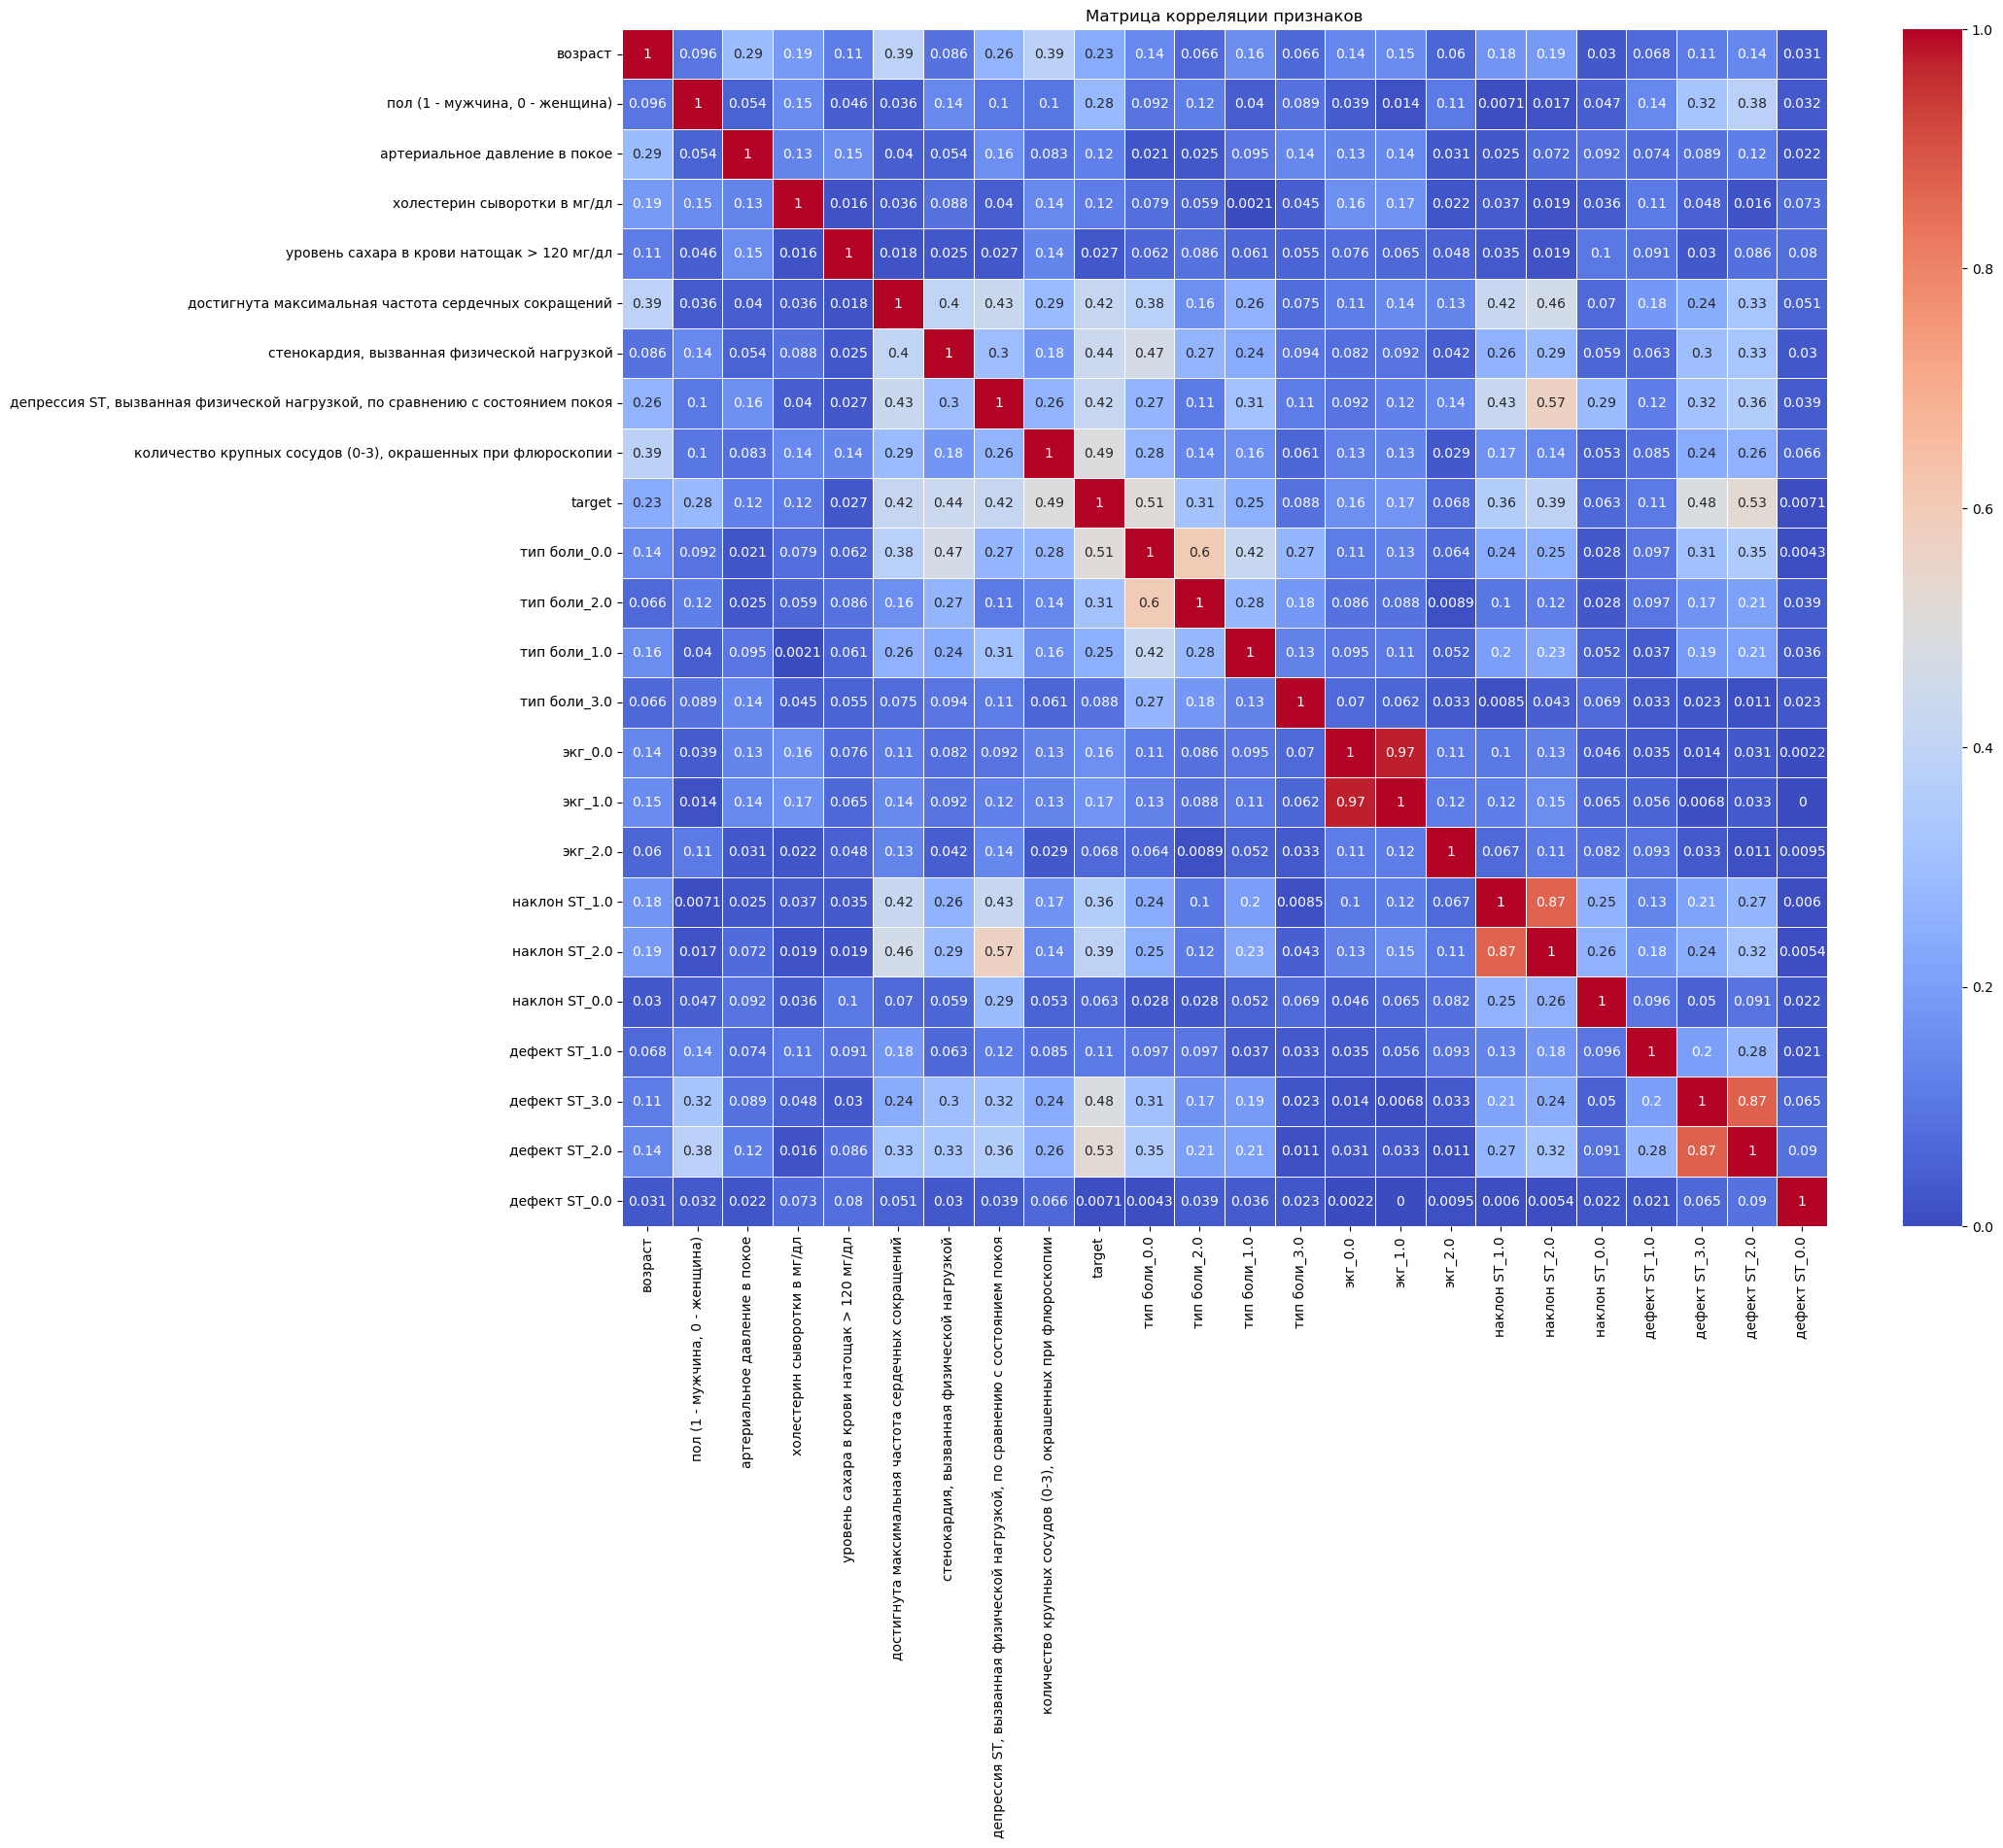

In [41]:
# Построение матрицы корреляции для корреляционного анализа
plt.figure(figsize=(20,16))
corr_matrix = df_heart.corr(method='spearman').abs() #Так как количественные меры распределены не нормально, стоит избегать корреляции Пирсона
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', linewidths=.5)
plt.title('Матрица корреляции признаков')

In [42]:
# Основные влияющие на target переменные
target_corr = df_heart.corr(method='spearman')['target'].abs()
selected_features = target_corr[(target_corr.abs()>=0.2)&(target_corr.abs()<=0.7)]
selected_features.sort_values(ascending=True)

возраст                                                                          0.234845
тип боли_1.0                                                                     0.247649
пол (1 - мужчина, 0 - женщина)                                                   0.283609
тип боли_2.0                                                                     0.313696
наклон ST_1.0                                                                    0.360258
наклон ST_2.0                                                                    0.392121
достигнута максимальная частота сердечных сокращений                             0.417979
депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя    0.419631
стенокардия, вызванная физической нагрузкой                                      0.435601
дефект ST_3.0                                                                    0.484887
количество крупных сосудов (0-3), окрашенных при флюроскопии                     0.492989
тип боли_0

### Признаки дефект ST_3.0 и дефект ST_2.0 имеют корреляцию выше 80%, а так же наклон ST_2.0 и наклон ST_1.0 имеют корреляцию выше 80% это указывает на признак мультиколлинеарности и может быть проблемой при дальнейшем изучении. Поэтому удаляем один из признаков с меньшим влиянием на target переменную

In [44]:
selected_features = selected_features.drop(columns=['дефект ST_2.0','наклон ST_2.0'])

In [45]:
# Финальный список признаков для дальнейшего изучения, по итогам корреляционного анализа
selected_features_df = selected_features.reset_index()
selected_features_df.columns=['Feature','Importance']
selected_features_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
12,дефект ST_2.0,0.526030
6,тип боли_0.0,0.514626
5,"количество крупных сосудов (0-3), окрашенных п...",0.492989
11,дефект ST_3.0,0.484887
3,"стенокардия, вызванная физической нагрузкой",0.435601
4,"депрессия ST, вызванная физической нагрузкой, ...",0.419631
2,достигнута максимальная частота сердечных сокр...,0.417979
10,наклон ST_2.0,0.392121
9,наклон ST_1.0,0.360258
7,тип боли_2.0,0.313696


## Дополнительный анализ значимости признаков

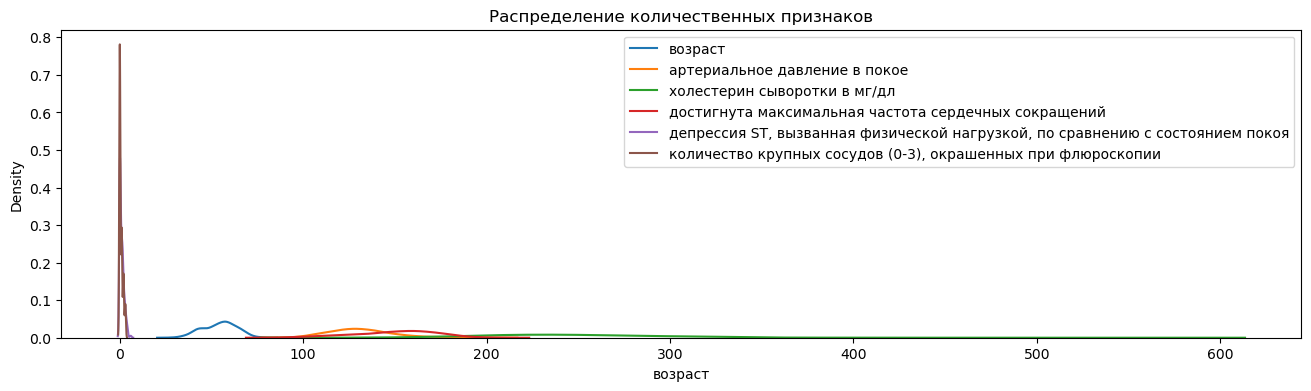

In [47]:
plt.figure(figsize=(16,4))
for feature in numeric_values:
    sns.kdeplot(df_heart[feature], label=feature)
plt.title('Распределение количественных признаков')
plt.legend()
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Разделяем признаки на главный target и влияющие (все кроме target)
X = df_heart.drop(columns=['target'])
y = df_heart['target']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [50]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [51]:
#Извлекаем список важности признаков
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

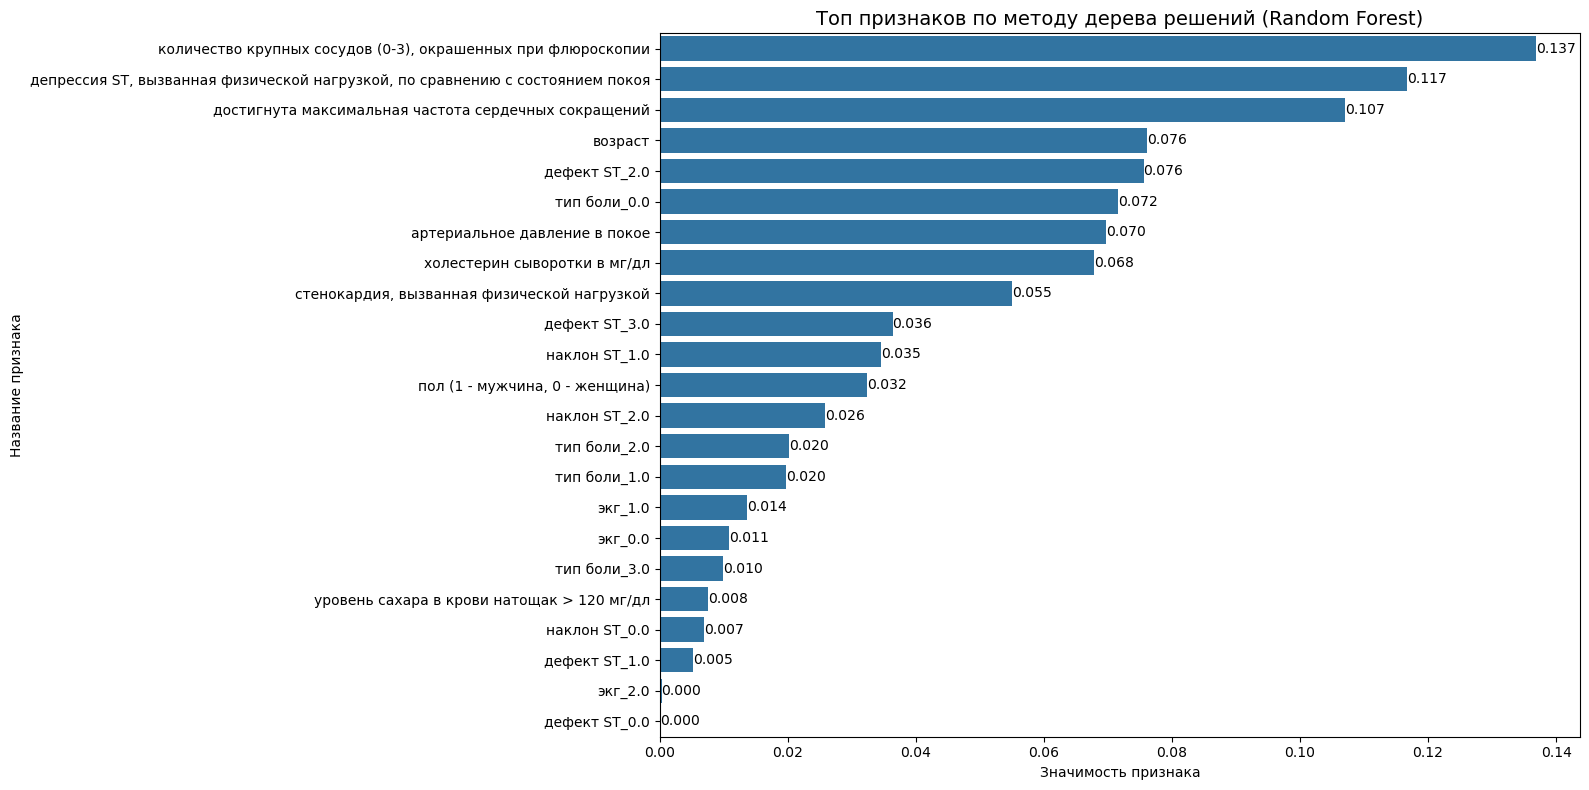

In [52]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=feature_importance, x='Importance', y='Feature')

ax.set_title('Топ признаков по методу дерева решений (Random Forest)', fontsize=14)
ax.set_xlabel('Значимость признака')
ax.set_ylabel('Название признака')

# Добавляем подписи к столбцам
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.tight_layout()
plt.show()

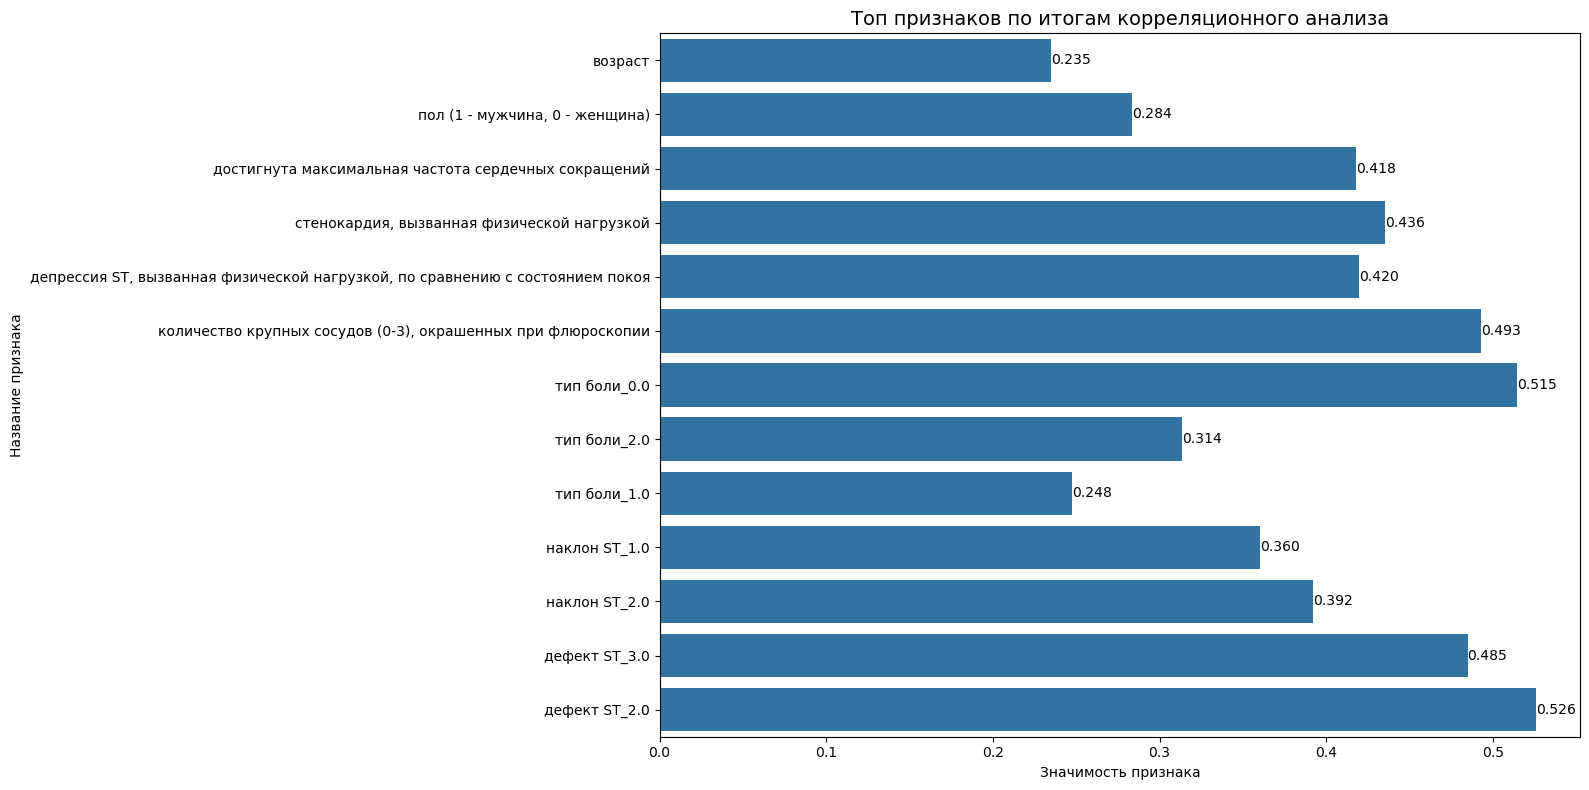

In [53]:
plt.figure(figsize=(16, 8))
ax = sns.barplot(data=selected_features_df, x='Importance', y='Feature')

ax.set_title('Топ признаков по итогам корреляционного анализа', fontsize=14)
ax.set_xlabel('Значимость признака')
ax.set_ylabel('Название признака')

# Добавляем подписи к столбцам
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

plt.tight_layout()
plt.show()

In [54]:
selected_features_df.rename(columns={'Importance': 'Correlation'}, inplace=True)
feature_importance_prior_features = feature_importance[feature_importance['Importance']>0.01]

In [55]:
merged_df = pd.merge(feature_importance_prior_features, selected_features_df, on='Feature', how='outer')

In [56]:
# итоговый список отобранных признаков для проведения стат тестов
merged_df.sort_values(by='Importance', ascending=False)

,Feature,Importance,Correlation
6,"количество крупных сосудов (0-3), окрашенных п...",0.136883,0.492989
2,"депрессия ST, вызванная физической нагрузкой, ...",0.116675,0.419631
5,достигнута максимальная частота сердечных сокр...,0.107106,0.417979
1,возраст,0.076120,0.234845
3,дефект ST_2.0,0.075566,0.526030
11,тип боли_0.0,0.071545,0.514626
0,артериальное давление в покое,0.069663,NaN
14,холестерин сыворотки в мг/дл,0.067891,NaN
10,"стенокардия, вызванная физической нагрузкой",0.055076,0.435601
4,дефект ST_3.0,0.036382,0.484887


### 🧾 Краткий вывод по отобранным признакам

✅ **Сильное совпадение двух подходов:**

Признаки `дефект ST_2.0`, `достигнута максимальная частота сердечных сокращений`, `тип боли_2.0`, `тип боли_1.0`, `наклон ST_2.0` показали высокую **и корреляцию, и важность** — они особенно перспективны для дальнейшего анализа и статистических тестов.

---

🧠 **Признаки с высокой важностью, но без корреляции:**

Например, `артериальное давление в покое`, `холестерин`, `тип боли_3.0` — важны по Random Forest, но не проявляют линейной связи (возможно, у них **нелинейная зависимость**, улавливаемая деревьями решений).

---

📉 **Признаки с высокой корреляцией, но низкой важностью:**

Признак `тип боли_0.0` имеет сильную отрицательную корреляцию, но модель оценивает его вклад как небольшой — возможно, его влияние **перекрывается другими признаками**.

---

🧬 **Клинически значимые признаки:**

Признаки `возраст` и `пол (1 - мужчина, 0 - женщина)` включены в список кандидатов на проведение статтестов несмотря на умеренные значения важности и корреляции. Эти признаки являются **ключевыми в медицинском контексте** и могут выявить значимые различия между группами.

---

⚠️ **Пропуски в корреляции (NaN):**

Это признаки, которые **не участвовали в корреляционном анализе** — вероятно, не показали значимых линейных связей или были исключены ранее.

---

🟢 **Вывод:**

Для проведения **статистических тестов и финального анализа** рекомендовано:
- Ориентироваться на признаки, показавшие значимость по обоим подходам.
- Обязательно включить `возраст` и `пол` как **базовые демографические параметры**.
